In [ ]:
import warnings;
warnings.simplefilter('ignore')

0.Install and import Dependencies

In [7]:
!python -m pip install prophet

  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 6.7 MB/s eta 0:00:02
   

In [11]:
import pandas as pd
from prophet import Prophet

1.Read in Data and Process Dates

In [13]:
df = pd.read_csv('dataset.csv')

In [15]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [19]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [21]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [23]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [25]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] +'-'+ df['Month'] +'-'+df['Day'])

In [27]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [29]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [31]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [33]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


2.Train model

In [43]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [35]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

13:57:07 - cmdstanpy - INFO - Chain [1] start processing
13:57:07 - cmdstanpy - INFO - Chain [1] done processing


3.Forecast

In [39]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,885.049449,3955.457559,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,781.934839,3977.013973,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,816.524669,4026.362689,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,985.434035,4106.882329,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,866.770616,4018.603454,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [41]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.903162,2015.110141,5505.512872,4234.257512,4241.327610,-509.966196,-509.966196,-509.966196,472.568897,...,16.615617,16.615617,16.615617,-999.150710,-999.150710,-999.150710,0.0,0.0,0.0,3727.936966
1176,2021-03-23,4238.989539,2137.949060,5207.629013,4235.268043,4242.463117,-527.435391,-527.435391,-527.435391,472.568897,...,-11.291430,-11.291430,-11.291430,-988.712858,-988.712858,-988.712858,0.0,0.0,0.0,3711.554148
1177,2021-03-24,4240.075916,2041.394998,5254.280012,4236.280526,4243.601094,-512.907214,-512.907214,-512.907214,472.568897,...,-4.423866,-4.423866,-4.423866,-981.052245,-981.052245,-981.052245,0.0,0.0,0.0,3727.168702
1178,2021-03-25,4241.162293,2250.745872,5314.896978,4237.293379,4244.727763,-481.684909,-481.684909,-481.684909,472.568897,...,22.497946,22.497946,22.497946,-976.751752,-976.751752,-976.751752,0.0,0.0,0.0,3759.477383
1179,2021-03-26,4242.248670,2094.120459,5348.224466,4238.306580,4245.860133,-538.306508,-538.306508,-538.306508,472.568897,...,-34.566066,-34.566066,-34.566066,-976.309339,-976.309339,-976.309339,0.0,0.0,0.0,3703.942162


In [45]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2405.949560
1,2018-01-02,2396.511167
2,2018-01-03,2423.027170
3,2018-01-04,2470.701889
4,2018-01-05,2435.367255
...,...,...
1175,2021-03-22,3727.936966
1176,2021-03-23,3711.554148
1177,2021-03-24,3727.168702
1178,2021-03-25,3759.477383


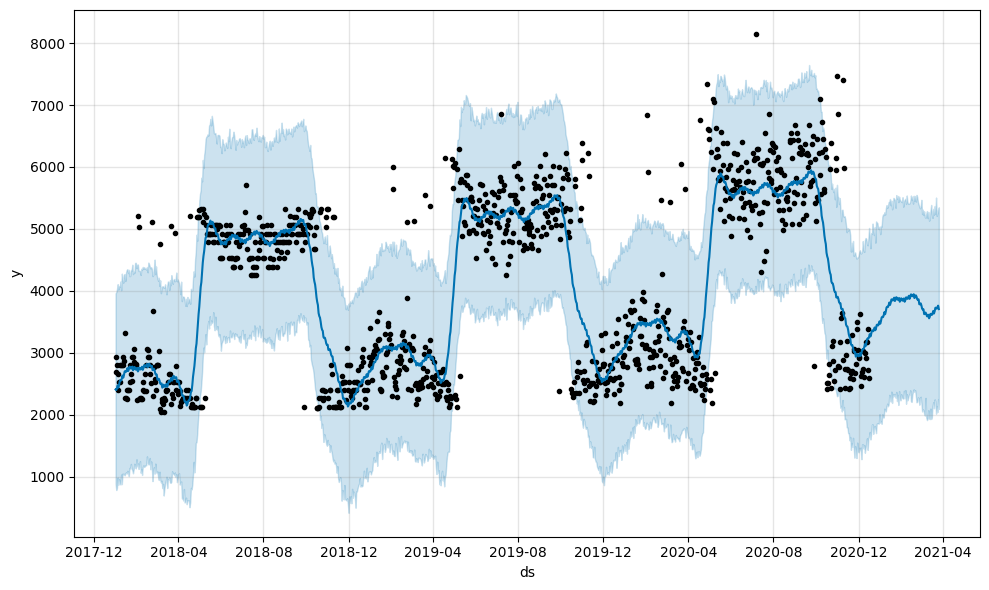

In [48]:
plot1 = m.plot(forecast)

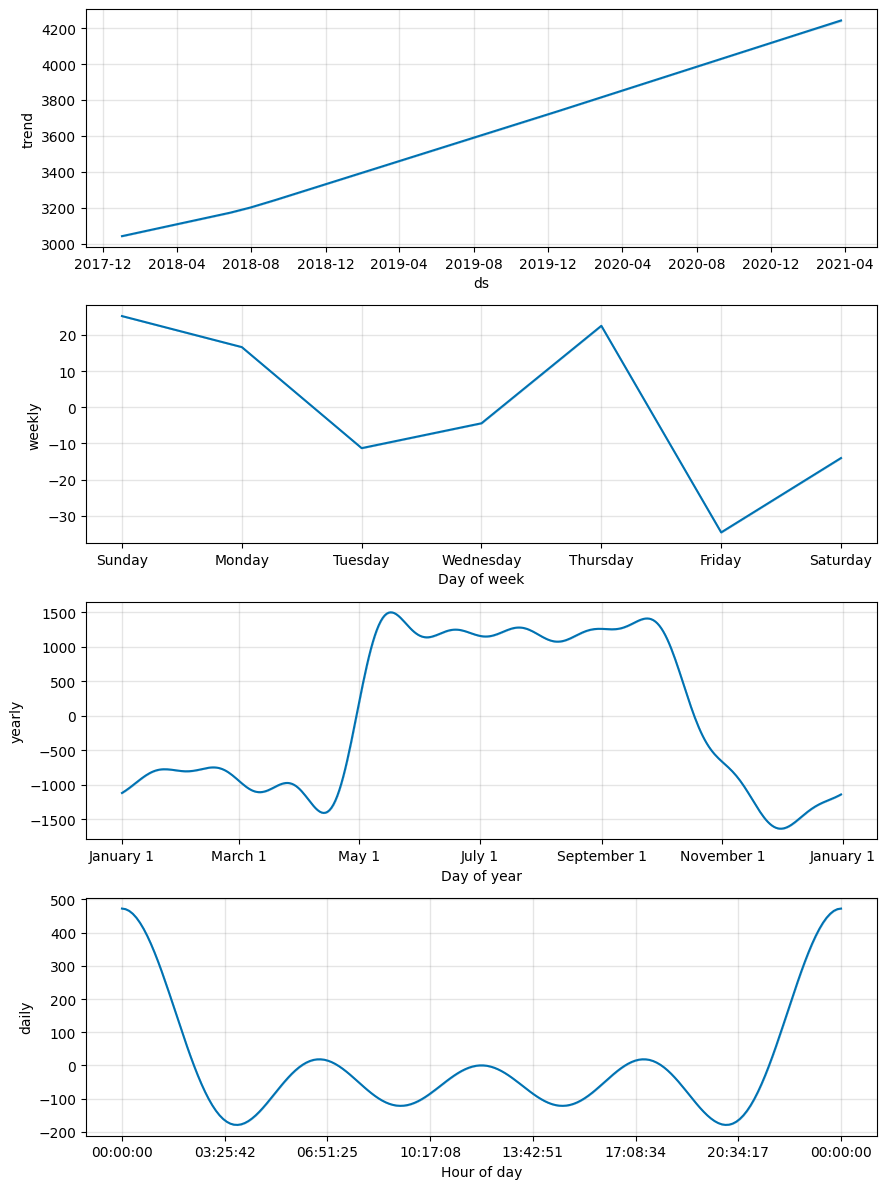

In [50]:
plot2 = m.plot_components(forecast)